In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.metrics import precision_recall_curve, auc, precision_score, recall_score, f1_score

In [4]:
import glob

def get_idxs(group, date = None):

    """
    Looks for the different indexes and lists them and theri info from the paraneter file
    """

    if group == 'rare_feature_temp':
        idxs = glob.glob('results/rare_feature_temp/*')

    elif group == 'rare_feature_value':
        idxs = glob.glob('results/rare_feature_value/*')

    elif group == 'rare_time_temp':
        idxs = glob.glob('results/rare_time_temp/*')

    elif group == 'rare_time_value':
        idxs = glob.glob('results/rare_time_value/*')

    else:
        raise ValueError('Group not recognized')

    for i in idxs:
        # print('\n\n' + i)

        print_dict = {}
        with open(glob.glob(i + '/*_params.txt')[0], 'r') as f:
            lines = f.readlines()
            for line in lines:
                print_dict[line.split(': ')[0]] = line.split(': ')[1].strip()
            
            if date is not None:
                if date in print_dict['time']:
                    print('\n\n' + i)
                    print(print_dict['time'])
                    print(print_dict['explainers'])
                    print(print_dict['hidden_dim'])
                    print(print_dict['device'])
                    print(print_dict['L'])
            else:
                print(print_dict)

get_idxs('rare_feature_temp')
get_idxs('rare_feature_value')
get_idxs('rare_time_temp')
get_idxs('rare_time_value')

{'some_index': '212582', 'time': '2025-12-02 06:46:03', 'seed': '0', 'N_ex': '5', 'explainers': "['MFF-FMA-E', 'MFF-GB-E', 'MFF-D-E']", 'N_feat': '50', 'N_time': '100', 'N_select': '5', 'device': 'cuda:0', 'lambda_l1': '0.1', 'lambda_tv': '1e-06', 'lambda_sharp': '1e-05', 'n_epochs': '2000', 'lr': '0.01', 'hidden_dim': '128', 'popsize': '100', 'radius_init': '3', 'center_learning_rate': '0.5', 'stdev_learning_rate': '0.3'}
{'some_index': '423202', 'time': '2025-12-03 21:46:29', 'seed': '0', 'N_ex': '10', 'explainers': "['MFF-FMA-E', 'MFF-GB-E', 'MFF-D-E']", 'N_feat': '50', 'N_time': '100', 'N_select': '5', 'device': 'cuda:0', 'lambda_l1': '0.1', 'lambda_tv': '0.001', 'lambda_sharp': '0', 'n_epochs': '2000', 'lr': '0.01', 'hidden_dim': '16', 'L': '24', 'popsize': '100', 'radius_init': '3', 'center_learning_rate': '0.5', 'stdev_learning_rate': '0.3'}
{'some_index': '858696', 'time': '2025-12-02 12:45:32', 'seed': '0', 'N_ex': '5', 'explainers': "['MFF-FMA-E', 'MFF-GB-E', 'MFF-D-E']", 'N_

In [5]:
def get_entropy_array(saliency: np.ndarray, eps: float = 1.0e-5):
    """This methods returns the entropy contained in the identifiers for the saliency numpy array.

    Args:
        saliency: The (N_samples) saliency array from which information is extracted.
        eps: Small parameter for numerical stability.

    Returns:
        Entropy as a torch scalar.
    """
    entropy_tensor = saliency * np.abs(np.log2(eps + saliency)) + (1 - saliency) * np.abs(np.log2(eps + 1 - saliency))
    saliency_entropy = entropy_tensor.sum()
    return saliency_entropy

def get_information_array(saliency: np.ndarray, eps: float = 1.0e-5):
    """This methods returns the information contained in the identifiers for the saliency numpy array.

    Args:
        eps: Small parameter for numerical stability.
        saliency: The (N_samples) saliency array from which information is extracted.

    Returns:
        Information content as a torch scalar.
    """
    saliency_information = (np.abs(np.log2(1 - saliency + eps))).sum()
    return saliency_information

In [20]:
# get_idxs('rare_feature_temp')
# get_idxs('rare_feature_value')
# get_idxs('rare_time_temp')
get_idxs('rare_time_value')

{'some_index': '922281', 'time': '2025-12-04 01:34:30', 'seed': '0', 'N_ex': '10', 'explainers': "['MFF-FMA-E', 'MFF-GB-E', 'MFF-D-E']", 'N_feat': '3', 'N_time': '100', 'N_select': '5', 'device': 'cuda:0', 'lambda_l1': '0.1', 'lambda_tv': '0.001', 'lambda_sharp': '1.0000000000000001e-07', 'n_epochs': '1000', 'lr': '0.01', 'hidden_dim': '128'}


In [13]:
from attribution.perturbation_conti import MaskFunctionFourier, MaskFunctionMLP, MaskTensor

results/rare_feature_value/388004/rare_feature_value_388004_MFF-D-E_cv0_fitted.pt


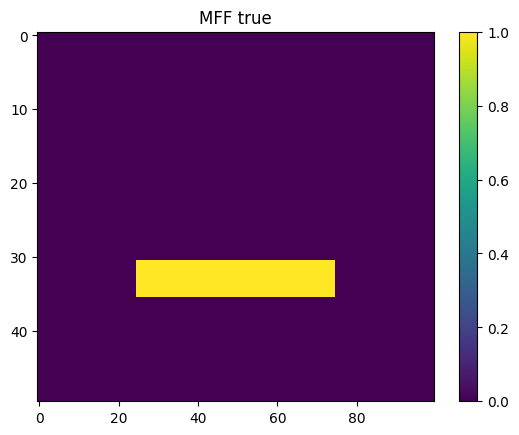

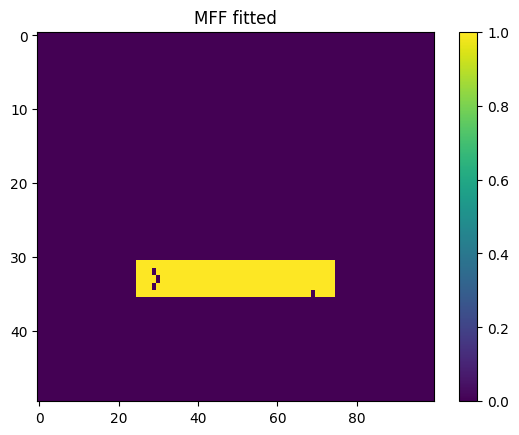

results/rare_feature_value/388004/rare_feature_value_388004_MFF-D-E_cv1_fitted.pt


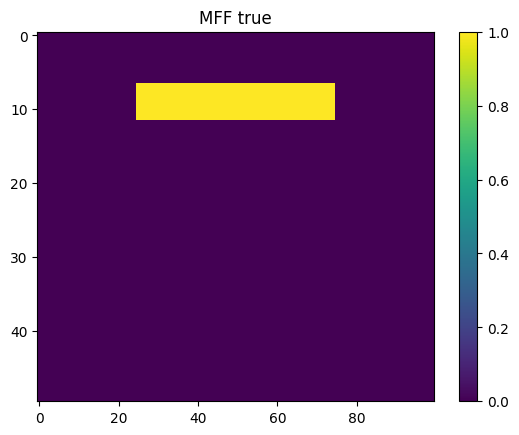

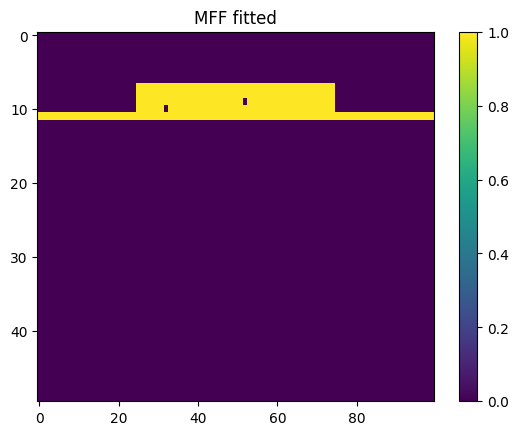

results/rare_feature_value/388004/rare_feature_value_388004_MFF-D-E_cv2_fitted.pt


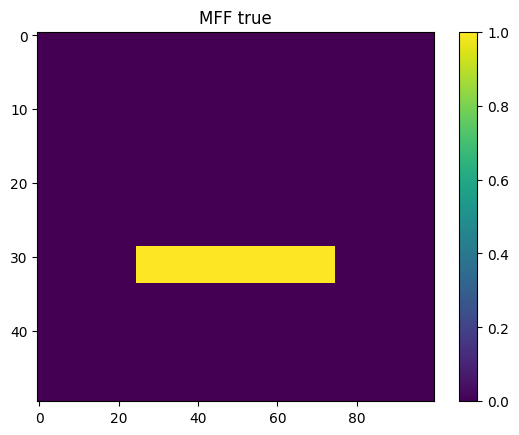

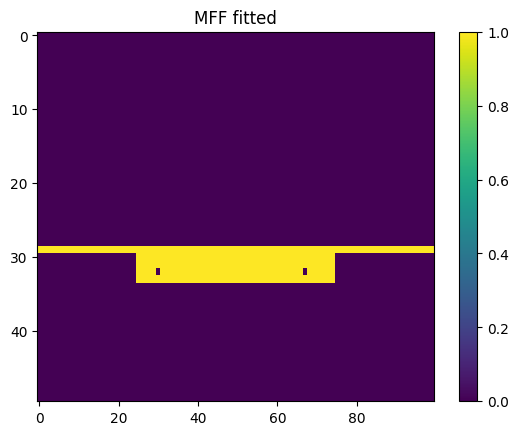

results/rare_feature_value/388004/rare_feature_value_388004_MFF-D-E_cv3_fitted.pt


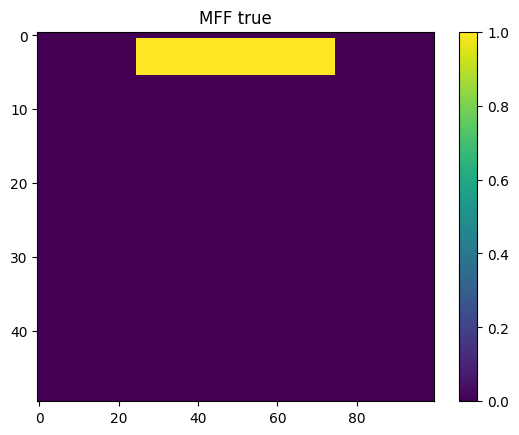

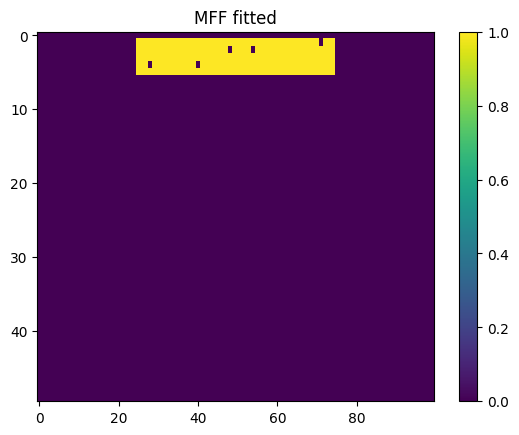

In [24]:
exp_group = 'rare_feature_value' # out of ['rare_feature_temp', 'rare_feature_value', 'rare_time_temp', 'rare_time_value']
pertubation = 'D' # out of ['FMA', 'GB', 'D']
idx = '388004' # select the index
opt = 'E' # out of ['G', 'E']
explainer_opts = ['MFF'] # out of ['MFF', 'MFH', 'MFMLP', 'MFS', 'MT']

# set to false if you do not want to compare the masks
plot = True

prec_l = []
rec_l = []
f1_l = []
I_l = []
S_l = []

for cv in range(4):

    first = True

    for explainer in explainer_opts:
        
        path = f'results/{exp_group}/{idx}/{exp_group}_{idx}_{explainer}-{pertubation}-{opt}_cv{cv}_fitted.pt'
        print(path)
        fitted = torch.load(path, map_location='cpu').detach()
        path = f'results/{exp_group}/{idx}/{exp_group}_{idx}_{explainer}-{pertubation}-{opt}_cv{cv}_true.pt'
        true = torch.load(path, map_location='cpu').detach()

        if first:
            plt.imshow(
            true[0, :, :].cpu().numpy().T,
            cmap='viridis',
            interpolation='nearest',
            aspect='auto',
            vmin=0,
            vmax=1
            )
            plt.title(f'{explainer} true')
            plt.colorbar()
            plt.show()
            first = False
        
        plt.imshow(
            fitted[0, :, :].cpu().numpy().T,
            cmap='viridis',
            interpolation='nearest',
            aspect='auto',
            vmin=0,
            vmax=1
        )
        plt.title(f'{explainer} fitted')
        plt.colorbar()
        plt.show()

        prec_l.append(precision_score(true.flatten().cpu().numpy(), (fitted>0.5).flatten().cpu().numpy()))
        rec_l.append(recall_score(true.flatten().cpu().numpy(), (fitted>0.5).flatten().cpu().numpy()))
        f1_l.append(f1_score(true.flatten().cpu().numpy(), (fitted>0.5).flatten().cpu().numpy()))
        I_l.append(get_information_array(fitted.flatten().cpu().numpy()[true.flatten().cpu().numpy()!=0]))
        S_l.append(get_entropy_array(fitted.flatten().cpu().numpy()[true.flatten().cpu().numpy()!=0]))


In [25]:
print(f'F1: {np.mean(f1_l):.3f} +/- {np.std(f1_l):.3f}')
print(f'Prec: {np.mean(prec_l):.3f} +/- {np.std(prec_l):.3f}')
print(f'Rec: {np.mean(rec_l):.3f} +/- {np.std(rec_l):.3f}')
print(f'I: {np.mean(I_l):.3f} +/- {np.std(I_l):.3f}')
print(f'S: {np.mean(S_l):.3f} +/- {np.std(S_l):.3f}')

F1: 0.948 +/- 0.043
Prec: 0.916 +/- 0.084
Rec: 0.987 +/- 0.005
I: 4098.429 +/- 21.577
S: 0.004 +/- 0.000
